[View in Colaboratory](https://colab.research.google.com/github/karangautam/Learning-Samples/blob/master/Francois_Chollet_Book.ipynb)

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
train_labels[0]

1

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 2s 1us/step


In [0]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items() ])

In [0]:
decoded_review = ' '.join(reverse_word_index.get(i - 3,'?') for i in train_data[0])

In [0]:
import numpy as np

In [0]:
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

In [0]:
x_train= vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
y_train[0]

1.0

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [0]:
x_val= x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.5079 - acc: 0.7815 - val_loss: 0.3794 - val_acc: 0.8693
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.3007 - acc: 0.9044 - val_loss: 0.3006 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2182 - acc: 0.9282 - val_loss: 0.3084 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1753 - acc: 0.9435 - val_loss: 0.2834 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1430 - acc: 0.9544 - val_loss: 0.2845 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1154 - acc: 0.9649 - val_loss: 0.3119 - val_acc: 0.8787
Epoch 7/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0983 - acc: 0.9707 - val_loss: 0.3123 - 

15000/15000 [==============================] - 2s 116us/step - loss: 0.0666 - acc: 0.9818 - val_loss: 0.3617 - val_acc: 0.8782
Epoch 10/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0563 - acc: 0.9851 - val_loss: 0.3827 - val_acc: 0.8790
Epoch 11/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0454 - acc: 0.9884 - val_loss: 0.4147 - val_acc: 0.8766
Epoch 12/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0389 - acc: 0.9913 - val_loss: 0.4487 - val_acc: 0.8696
Epoch 13/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0304 - acc: 0.9927 - val_loss: 0.4674 - val_acc: 0.8730
Epoch 14/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0253 - acc: 0.9946 - val_loss: 0.5007 - val_acc: 0.8719
Epoch 15/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0178 - acc: 0.9981 - val_loss: 0.5519 - val_acc: 0.8667
Epoch 16/20
15000/15000 [==============

15000/15000 [==============================] - 2s 115us/step - loss: 0.0131 - acc: 0.9969 - val_loss: 0.6489 - val_acc: 0.8681
Epoch 19/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0056 - acc: 0.9997 - val_loss: 0.7120 - val_acc: 0.8591
Epoch 20/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0091 - acc: 0.9983 - val_loss: 0.7065 - val_acc: 0.8665


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

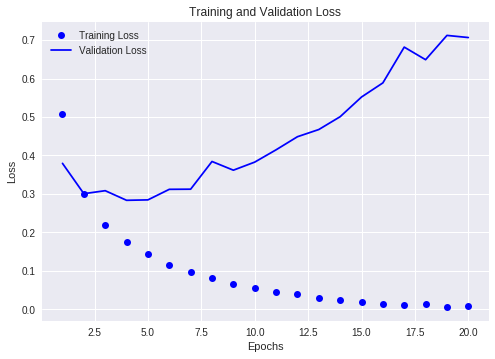

In [0]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

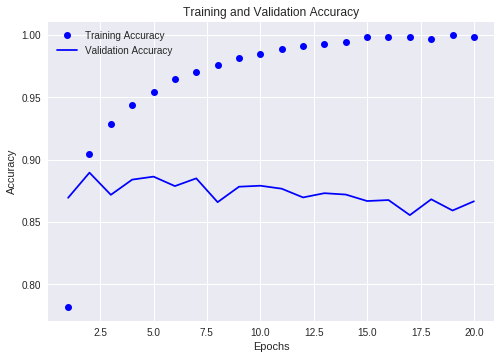

In [0]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 21)

plt.plot(epochs,acc_values,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.1232 - acc: 0.8383
Epoch 2/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.0550 - acc: 0.9300
Epoch 3/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.0386 - acc: 0.9547
Epoch 4/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.0304 - acc: 0.9656
Epoch 5/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.0258 - acc: 0.9716
Epoch 6/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.0226 - acc: 0.9757
Epoch 7/20
 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0206 - acc: 0.9785

25000/25000 [==============================] - 2s 99us/step - loss: 0.0219 - acc: 0.9760
Epoch 8/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.0221 - acc: 0.9750
Epoch 9/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.0206 - acc: 0.9772
Epoch 10/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.0193 - acc: 0.9791
Epoch 11/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.0174 - acc: 0.9813
Epoch 12/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.0161 - acc: 0.9835
Epoch 13/20
 1024/25000 [>.............................] - ETA: 2s - loss: 0.0112 - acc: 0.9863

25000/25000 [==============================] - 3s 103us/step - loss: 0.0164 - acc: 0.9826
Epoch 14/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.0173 - acc: 0.9814
Epoch 15/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.0176 - acc: 0.9808
Epoch 16/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.0170 - acc: 0.9818
Epoch 17/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.0167 - acc: 0.9818
Epoch 18/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.0156 - acc: 0.9835
Epoch 19/20
 5632/25000 [=====>........................] - ETA: 2s - loss: 0.0153 - acc: 0.9846

25000/25000 [==============================] - 3s 102us/step - loss: 0.0160 - acc: 0.9829
Epoch 20/20
25000/25000 [==============================] - 2s 93us/step


In [0]:

results 


[0.1328080371505022, 0.85708]

In [0]:
results

[0.8726679766315222, 0.8522]